# **Data Dictionary**

**SalesID**                    of a machine at auction
                             identifier for a particular machine;

**MachineID**                  machines may have multiple sales
                             identifier for a unique machine model

**ModelID**                    (i.e. fiModelDesc)
                             source of the sale record; some
                           sources are more diligent about
                           reporting attributes of the machine
                           than others. Note that a particular
                           datasource may report on multiple

**datasource**                auctioneerIDs.
                             identifier of a particular auctioneer,
                           i.e. company that sold the machine at

**auctioneerID**              auction. Not the same as datasource.

**YearMade**                     year of manufacturer of the Machine
                             current usage of the machine in
                           hours at time of sale (saledate); null
                           or 0 means no hours have been

**MachineHoursCurrentMeter**   reported for that sale
                             value (low, medium, high) calculated
                           comparing this particular Machine-
                           Sale hours to average usage for the
                           fiBaseModel; e.g. 'Low' means this
                           machine has less hours given it's
                           lifespan relative to average of

**UsageBand**                 fiBaseModel.

**Saledate**                   time of sale

**Saleprice**                 cost of sale in USD
                             Description of a unique machine
                           model (see ModelID); concatenation
                           of fiBaseModel & fiSecondaryDesc &

**fiModelDesc**              fiModelSeries & fiModelDescriptor

**fiBaseModel**                disaggregation of fiModelDesc

**fiSecondaryDesc**           disaggregation of fiModelDesc

**fiModelSeries**            disaggregation of fiModelDesc

**fiModelDescriptor**          disaggregation of fiModelDesc

**ProductSize**            Don't know what this is                  group.
                             description of 2nd level hierarchical
                           grouping (below ProductGroup) of

**ProductClassDesc**           fiModelDesc

**State**                        US State in which sale occurred
                             identifier for top-level hierarchical

**ProductGroup**               grouping of fiModelDesc
                             description of top-level hierarchical

**ProductGroupDesc**           grouping of fiModelDesc
                           machine configuration; typcially

**Drive_System**               describes whether 2 or 4 wheel drive
                           machine configuration - does machine

**Enclosure**                  have an enclosed cab or not
                           machine configuration - attachment

**Forks**                      used for lifting
                           machine configuration - type of treads

**Pad_Type**                   a crawler machine uses
                           machine configuration - optional
                           feature on loaders to make the ride

**Ride_Control**               smoother

**Stick**                      machine configuration - type of control
                           machine configuration - describes
                           type of transmission; typically

**Transmission**               automatic or manual
                          machine configuration - engine

**Turbocharged**              naturally aspirated or turbocharged
                          machine configuration - extension of

**Blade_Extension**           standard blade

**Blade_Width**               machine configuration - width of blade
                          machine configuration - does machine

**Enclosure_Type**            have an enclosed cab or not
                          machine configuration - engine

**Engine_Horsepower**         horsepower rating
                          machine configuration - type of

**Hydraulics**                hydraulics

**Pushblock**                 machine configuration - option
                          machine configuration - implement

**Ripper**                    attached to machine to till soil
                          machine configuration - implement

**Scarifier**                 attached to machine to condition soil
                          machine configuration - type of blade

**Tip_control**               control
                          machine configuration - size of

**Tire_Size**                 primary tires
                          machine configuration - type of

**Coupler**                   implement interface
                          machine configuration - type of

**Coupler_System**            implement interface
                          machine configuration - describes

**Grouser_Tracks**            ground contact interface
                          machine configuration - normal or

**Hydraulics_Flow**           high flow hydraulic system
                          machine configuration - type of treads

**Track_Type**                a crawler machine uses
                          machine configuration - width of

**Undercarriage_Pad_Width**   crawler treads
                          machine configuration - length of

**Stick_Length**              machine digging implement
                          machine configuration - attachment

**Thumb**                     used for grabbing
                          machine configuration - can adjust the
                          operator control configuration to suit

**Pattern_Changer**           the user
                          machine configuration - type of treads

**Grouser_Type**              a crawler machine uses
                          machine configuration - optional
                          interface used to add a backhoe

**Backhoe_Mounting**          attachment
                          machine configuration - describes

**Blade_Type**               type of blade
                          machine configuration - describes

**Travel_Controls**           operator control configuration
                          machine configuration - differential

**Differential_Type**         type, typically locking or standard
                          machine configuration - describes

**Steering_Controls**         operator control configuration


In [139]:
# Importing the tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [38]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/files/TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])

#**Data Exploration**

In [39]:
df.head()  #(Transpose to see every column)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


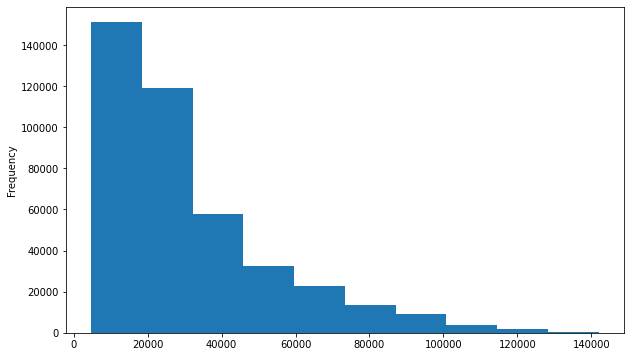

In [40]:
# Frequency of sales price

fig, ax = plt.subplots(figsize=(10,6))
ax = df['SalePrice'].plot.hist()

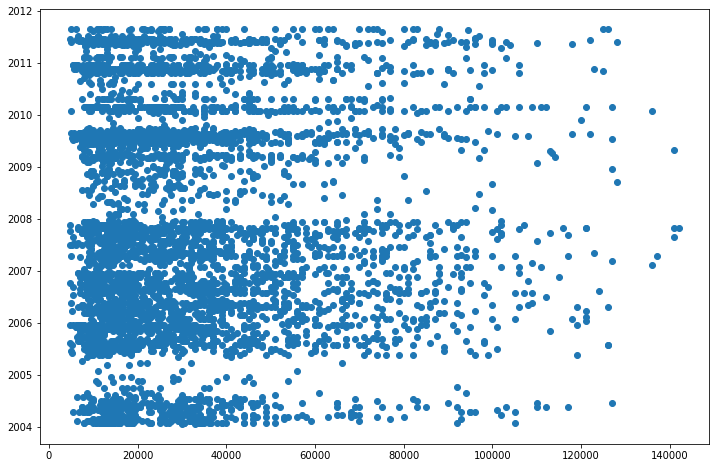

In [41]:
# Sales price by year for the first 5000 samples

fig, ax = plt.subplots(figsize=(12,8))
ax = plt.scatter(df['SalePrice'][:5000], df['saledate'][:5000])

In [42]:
# Sort the DataFrame by Date

df.sort_values('saledate', ascending=True, inplace=True)

In [43]:
# Making a copy of the original df

df_2 = df.copy()

In [44]:
# Split the saledate into day/month/year columns

df_2['year_sale'] = df_2['saledate'].dt.year
df_2['month_sale'] = df_2['saledate'].dt.month
df_2['day_sale'] = df_2['saledate'].dt.day

df_2.drop('saledate', axis=1, inplace=True)

#**Turning Data into Numbers / Filling Missing Values**

In [45]:
# Change the string dtype columns into category dtype columns so we can can convert them to numbers

for label, content in df_2.items():
  if pd.api.types.is_string_dtype(content):
    df_2[label] = content.astype('category').cat.as_ordered()

In [46]:
# Filling the numerical columns missing values

for label, content in df_2.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isna(content).sum():
      df_2[label + '_missing_value'] = pd.isna(content)
      df_2[label] = content.fillna(content.median())

In [54]:
# Turning the category columns into numbers
# 0 will be assigned to the missing values

for label, content in df_2.items():
  if not pd.api.types.is_numeric_dtype(content):
    df_2[label] = pd.Categorical(content).codes + 1  # Missing values will be 0 instead of -1

#**Modelling**

In [62]:
# Split data into train and validation

df_train = df_2[df_2['year_sale'] != 2012]
df_validate = df_2[df_2['year_sale'] == 2012]
len(df_train), len(df_validate)

(401125, 11573)

In [67]:
# Split data into X and y

X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
X_valid, y_valid = df_validate.drop('SalePrice', axis=1), df_validate['SalePrice']

In [84]:
# Evaluation functions

def rmsle(y_true, y_pred):
  """
  Calculates the root mean squared log error between predictions and true labels 
  """
  return np.sqrt(mean_squared_log_error(y_true, y_pred))

def show_scores(model):
  """
  Calculates the scores of our model
  """
  y_preds = model.predict(X_train)
  y_valid_preds = model.predict(X_valid)
  score = {
      'RMSLE': rmsle(y_train, y_preds),
      'MSLE': mean_squared_log_error(y_train, y_preds),
      'R2': r2_score(y_train, y_preds),
      'MAE': mean_absolute_error(y_train, y_preds),
      'RMSLE-Validation': rmsle(y_valid, y_valid_preds),
      'MSLE-Validation': mean_squared_log_error(y_valid, y_valid_preds),
      'R2-Validation': r2_score(y_valid, y_valid_preds),
      'MAE-Validation': mean_absolute_error(y_valid, y_valid_preds)
  }
  return score

In [71]:
# Train the model

%%time

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

model.fit(X_train, y_train)

CPU times: user 28.2 s, sys: 366 ms, total: 28.6 s
Wall time: 15.5 s


In [85]:
show_scores(model)

{'MAE': 5531.308859557494,
 'MAE-Validation': 7097.811086148795,
 'MSLE': 0.0658225358988104,
 'MSLE-Validation': 0.0839456817944636,
 'R2': 0.8620104145385641,
 'R2-Validation': 0.8340174443633719,
 'RMSLE': 0.2565590300472981,
 'RMSLE-Validation': 0.28973381196274556}

In [90]:
# Tuning our model with RSCV

%%time

rf_grid = {
    'n_estimators': np.arange(50 , 151, 10),
    'max_depth': [None, 3, 5, 10],
    'min_samples_leaf': np.arange(1, 21, 2),
    'min_samples_split': np.arange(2, 21, 2),
    'max_features': [1, 'auto', 'sqrt'],
    'max_samples': [10000]
}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=6,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 1min 21s, sys: 3.38 s, total: 1min 24s
Wall time: 2min 38s


In [93]:
# The ideal model

ideal_model = RandomForestRegressor(n_estimators = 70, 
                                    n_jobs= -1,
                                    min_samples_leaf = 1,
                                    min_samples_split = 14,
                                    max_features = 0.5
                                    )

ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=70,
                      n_jobs=-1)

#**Evaluate the Model**

In [94]:
show_scores(ideal_model)

{'MAE': 2995.731161303605,
 'MAE-Validation': 5908.243517428054,
 'MSLE': 0.021353310008188773,
 'MSLE-Validation': 0.05893393221458839,
 'R2': 0.957952583680232,
 'R2-Validation': 0.8827230903123455,
 'RMSLE': 0.14612771813789735,
 'RMSLE-Validation': 0.2427631195519377}

In [113]:
# Import the test data set / getting the test data set in the same format as the training dataset / evaluate the test data set

df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/files/Test.csv', low_memory=False, parse_dates=['saledate'])

In [114]:
df.sort_values('saledate', ascending=True, inplace=True)
df_test['year_sale'] = df_test['saledate'].dt.year
df_test['month_sale'] = df_test['saledate'].dt.month
df_test['day_sale'] = df_test['saledate'].dt.day

df_test.drop('saledate', axis=1, inplace=True)

for label, content in df_test.items():
  if pd.api.types.is_string_dtype(content):
    df_test[label] = content.astype('category').cat.as_ordered()

for label, content in df_test.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isna(content).sum():
      df_test[label + '_missing_value'] = pd.isna(content) 
      df_test[label] = content.fillna(content.median())

for label, content in df_test.items():
  if not pd.api.types.is_numeric_dtype(content):
    df_test[label] = pd.Categorical(content).codes + 1

In [115]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_missing_value'}

In [116]:
X_train.auctioneerID_missing_value

205615    False
274835    False
141296    False
212552    False
62755     False
          ...  
393098    False
400217    False
400302    False
400393    False
393123    False
Name: auctioneerID_missing_value, Length: 401125, dtype: bool

In [117]:
df_test['auctioneerID_missing_value'] = False

In [119]:
df_test = df_test[X_train.columns]

In [120]:
test_predictions = ideal_model.predict(df_test)

In [123]:
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalePrice'] = test_predictions
df_preds

,SalesID,SalePrice
0,1227829,18716.212620
1,1227844,16716.748981
2,1227847,46060.867853
3,1227848,60931.594696
4,1227863,51767.018570
...,...,...
12452,6643171,40795.615614
12453,6643173,13274.861296
12454,6643184,13865.376148
12455,6643186,19025.919483


In [124]:
df_preds.to_csv('Sales_Price_Predictions.csv')

#**Importance of the Features**

In [148]:
df_test.columns.shape, ideal_model.feature_importances_.shape

((56,), (56,))

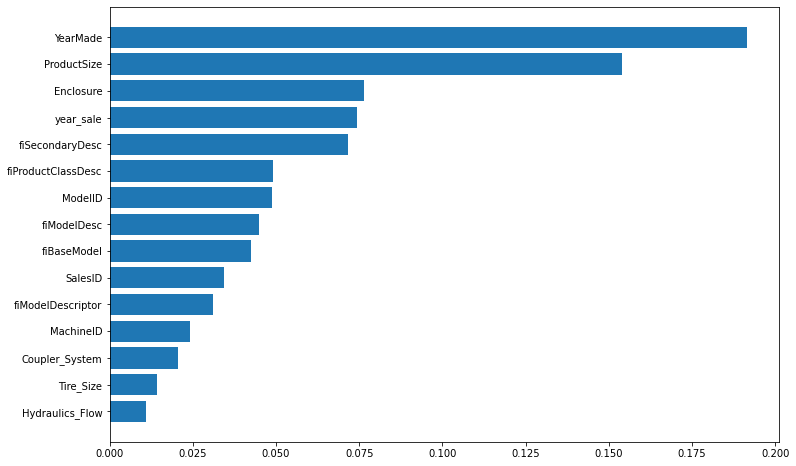

In [149]:
def features_importance(cols , importance):
  df = pd.DataFrame({
      'Features': cols,
      'Importance': importance
  }).sort_values('Importance')

  fig, ax = plt.subplots(figsize=(12,8))
  ax = plt.barh(df['Features'][-15:], df['Importance'][-15:])

features_importance(df_test.columns, ideal_model.feature_importances_)

In [150]:
import joblib
joblib.dump(ideal_model, filename="RandomForestRegressor_model.joblib")

['RandomForestRegressor_model.joblib']